In [2]:
import torch # torch will allow us to create tensors.
import torch.nn as nn # torch.nn allows us to create a neural network.
import torch.nn.functional as F # nn.functional give us access to the activation and loss functions.
from torch.optim import SGD # optim contains many optimizers. Here, we're using SGD, stochastic gradient descent.
import numpy as np
import lightning.pytorch as pl # lightning has tons of cool tools that make neural networks easier
from torch.utils.data import TensorDataset, DataLoader # these are needed for the training data
from torch import float64
import random
from tqdm import tqdm

C:\Users\paras\anaconda3\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [3]:
#path to dataset
x_path = "../Assignment 1 Data/2-2-x.txt"
y_path = "../Assignment 1 Data/2-2-f_x.txt"

#variable to hold things
x_raw = None
y_raw = None

# load the values into the variables
with open(x_path, "r") as x:
    x_raw = x.readlines()
    x_raw = list(map(lambda val: float(val), x_raw))

with open(y_path, "r") as y:
    y_raw = y.readlines()
    y_raw = list(map(lambda val: float(val), y_raw))

In [4]:
#Convert to torch tensors
x = torch.tensor(x_raw, dtype=float64, requires_grad=False)
y = torch.tensor(y_raw, dtype=float64, requires_grad=False)
cjk = torch.tensor([0] * 49, dtype=float64, requires_grad=True)


In [5]:
optimizer = SGD([cjk], lr=0.25, momentum=0.9)

In [6]:
# function to convert j,k in the f(x) to 0 based index in cjk tensor
# 7 because that is sqrt(49)
def jkToIndex(j, k):
    J = j + 3
    K = k + 3
    return (7*J + K)

#math functions
def psi(x):
    a = 1 + torch.exp(2 - (10 * x))
    b = 1 + torch.exp(2 + (10 * x))
    # a = a.to("cuda")
    # b = b.to("cuda")
    res =  (1 - (1 / a)) * (1 - (1 / b))
    # res = res.to("cuda")
    return res


#here c is a tensor of 49 values [-3-3,.......]
#x is now a tensor too ( try a tensor operation directly!)
#fx -> is also a tensor
def f(x, c):
    fx = torch.zeros(len(x), dtype=float64)
    for j in range(-3, 4):
        for k in range(-3, 4):
            i = jkToIndex(j,k)
            cjk = c[i]
            # cjk = cjk.to("cuda")
            multiplier = x - k
            # multiplier = multiplier.to("cuda")
            psi_inp = (2 ** j) * multiplier
            psi_out = psi(psi_inp)
            # psi_out = psi_out.to("cuda")
            cjkTerm = cjk * psi_out
            fx += cjkTerm
            # fx = fx.to("cuda")
    return fx


def train(cjk=cjk, optimizer=optimizer, num_epochs=200):
    # for epoch in tqdm(range(num_epochs)):
    for epoch in range(num_epochs):
        print("+" * 50)
        y_p = f(x, cjk)
        epoch_loss = nn.MSELoss()(y, y_p)

        # backward() calculates the derivative for that single value and adds it to the previous one.
        epoch_loss.backward()


        optimizer.step()  ## take a step toward the optimal value.
        optimizer.zero_grad()

        print(f"Epoch #: {epoch} | Epoch loss: {epoch_loss.data} \n")



In [18]:
train(num_epochs=2000)

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 0 | Epoch loss: 3.773759494564914e-06 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 1 | Epoch loss: 3.7735244337263002e-06 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 2 | Epoch loss: 3.773289440652258e-06 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 3 | Epoch loss: 3.7730545153199805e-06 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 4 | Epoch loss: 3.772819657706516e-06 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 5 | Epoch loss: 3.772584867789078e-06 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 6 | Epoch loss: 3.7723501455448277e-06 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 7 | Epoch loss: 3.7721154909509113e-06 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 8 | Epoch loss: 3.771880903984436e-06 

++++++++++++++++++++++++++++++++++++++++++++++++++
Epoch #: 9 | Epoch loss: 3.771646384622691e-0

C:\Users\paras\AppData\Local\Temp\ipykernel_23280\3698863137.py:10: RuntimeWarning: overflow encountered in exp
  a = 1 + np.exp(2 - (10 * x))
C:\Users\paras\AppData\Local\Temp\ipykernel_23280\3698863137.py:11: RuntimeWarning: overflow encountered in exp
  b = 1 + np.exp(2 + (10 * x))


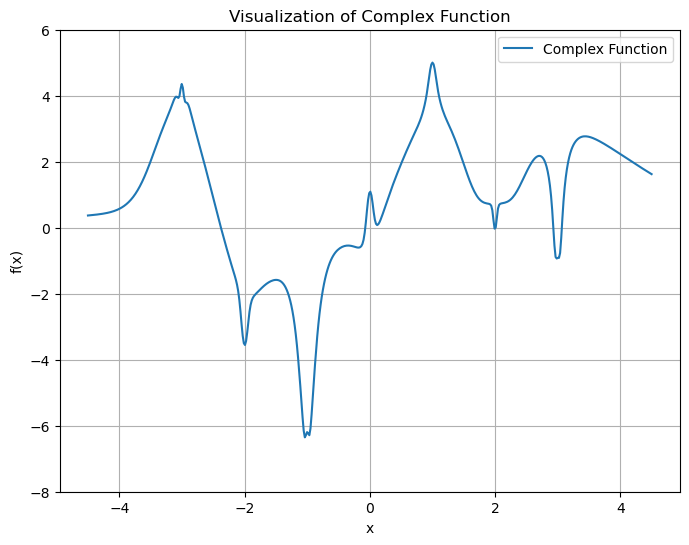

In [19]:
import matplotlib.pyplot as plt

# Define your complex function that takes parameter x
def graph_to_plot(x, cjk = cjk):
    cjk = cjk.tolist()
    return f_new(x, cjk)

#math functions
def psi_new(x):
    a = 1 + np.exp(2 - (10 * x))
    b = 1 + np.exp(2 + (10 * x))
    res =  (1 - (1 / a)) * (1 - (1 / b))
    return res


#here c is a tensor of 49 values [-3-3,.......]
def f_new(x, c):
    fx = 0
    for j in range(-3, 4):
        for k in range(-3, 4):
            i = jkToIndex(j,k)
            cjk = c[i]
            multiplier = x - k
            psi_inp = (2 ** j) * multiplier
            psi_out = psi_new(psi_inp)
            fx += cjk * psi_out
    return fx

def plot_graph(fn):
    # Generate x values
    x = torch.linspace(-4.5, 4.5, 500)

    # Calculate y values using the complex function
    y = [fn(x_val) for x_val in x]

    # Create a figure
    plt.figure(figsize=(8, 6))

    # Plot the complex function
    plt.plot(x, y, label='Complex Function')

    # Set y-axis limits
    plt.ylim(-8, 6)

    # Add labels and legend
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Visualization of Complex Function')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

plot_graph(graph_to_plot)


In [21]:
cjk

tensor([ 1.0863e+00, -5.7847e-01, -6.8337e-01, -1.9468e-01,  3.9378e-01,
         1.0291e+00,  2.4259e+00,  3.9967e-03, -1.2065e+00, -1.1427e+00,
        -4.5709e-03,  8.6970e-01, -8.2175e-02,  5.9537e-01,  4.9681e+00,
        -4.7183e-02,  9.6084e-01, -3.4268e-03,  2.0045e+00, -3.9668e+00,
         8.4164e-02,  1.2300e-02, -9.8656e-01, -2.9818e+00, -1.0096e+00,
         1.6991e-02,  9.7938e-01, -1.0491e+00,  9.9282e-01, -1.1846e-02,
        -4.0145e+00,  7.5991e-03,  9.8189e-01,  1.7321e-02, -1.9689e+00,
        -9.9588e-01, -1.9894e+00, -9.8855e-01,  1.9941e+00,  1.0156e+00,
        -1.6395e-02, -3.0182e+00,  9.9849e-01, -5.4093e-03,  9.9455e-01,
         2.8249e-03, -7.7370e-03, -9.9135e-01,  1.0067e+00],
       dtype=torch.float64, requires_grad=True)

In [14]:
# #Pytorch lightning code!
# class CjkFinder(pl.LightningModule):
#     def __init__(self):
#         super().__init__()
#         self.learning_rate = 0.01
#         self.momentum = 0.9
#
#         self.cjk = nn.Parameter(torch.tensor([0] * 49, dtype=float64, requires_grad=True))
#
#         # Register the parameter with the autograd engine
#         # self.register_parameter("cjk", self.cjk)
#
#     def forward(self, x_i):
#         y_p_i = f(x_i, self.cjk)
#         return y_p_i
#
#     def configure_optimizers(self):
#         # return SGD(self.parameters(), lr=self.learning_rate, momentum=self.momentum)
#         return SGD([self.cjk], lr=self.learning_rate, momentum=self.momentum)
#
#     def training_step(self, batch, batch_idx):  # take a step during gradient descent.
#         x_i, y_i = batch  # collect input
#         y_p_i = self.forward(x_i)  # run input through the neural network
#         loss = (y_p_i - y_i) ** 2  ## loss = MSE
#         self.log("epoch_loss", loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
#         return loss
# # model = CjkFinder()
# # trainer = pl.Trainer(max_epochs=2, accelerator="cpu")
# # trainer.fit(model, train_dataloaders=dataloader)
